# Projeto Censo

Análise exploratória e estudo sobre modelos de Machine Learning sobre uma base de renda do censo (sem informação prévia de local dos dados)

Variáveis (e type) contidos na base de origem:
* age: Integer, Idade
* workclass: String, Se a pessoa é funcionário público, autônomo, empresário etc
* fnlwgt, Integer, ?
* education: String, Níveis de Escolaridade
* education-num: Integer, Código do Nível de Escolaridade
* marital-status: String, Estado Civil
* occupation: String, Ocupação
* relationship: String, Relacionamento
* race: String, Raça
* sex: Binary(String), Sexo
* capital-gain: Integer, Ganho de Capital
* capital-loss: Integer, Perda de Capital
* hours-per-week: Integer, Horas de trabalho por Semana
* native-country: String, País Nativo
* income: Binary(String), Renda

---

Informações de variáveis retiradas da origem (https://archive.ics.uci.edu/dataset/2/adult)

## Importando libs e dados utilizadas no projeto

In [275]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

Carregando dados

In [276]:
df = pd.read_csv(f'data/adult.data')

## Informações primárias sobre a tipologia e estruturação dos dados
* Vamos observar como as variáveis estão distribuidas e como são estruturadas no dataframe

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32508 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32539 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32538 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32505 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [278]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,NaN,83311,NaN,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,NaN,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [279]:
# Variáveis quantitativas
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [280]:
# Variáveis categóricas
df.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32508,32539,32561,32538,32561,32561,32561,32505,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22666,10501,14976,4117,13193,27816,21790,29122,24720


## Análise exploratória

* Distribuição da renda (income)

---



<Axes: xlabel='income', ylabel='count'>

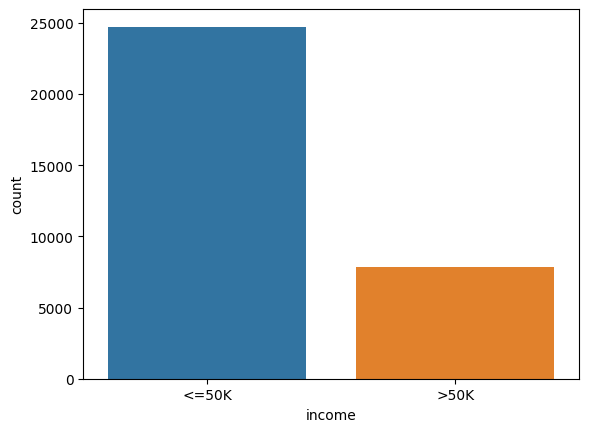

In [281]:
# setando cor azul para income = <=50K e laranja para income = >50K
color_income = {'<=50K': 'blue', '>50K': 'orange'}

sns.countplot(data=df, x='income')

In [282]:
df['income'].value_counts(),

(<=50K    24720
 >50K      7841
 Name: income, dtype: int64,)

* Distribuição da renda por Nível de Escolaridade (education)

---



<Axes: xlabel='count', ylabel='education'>

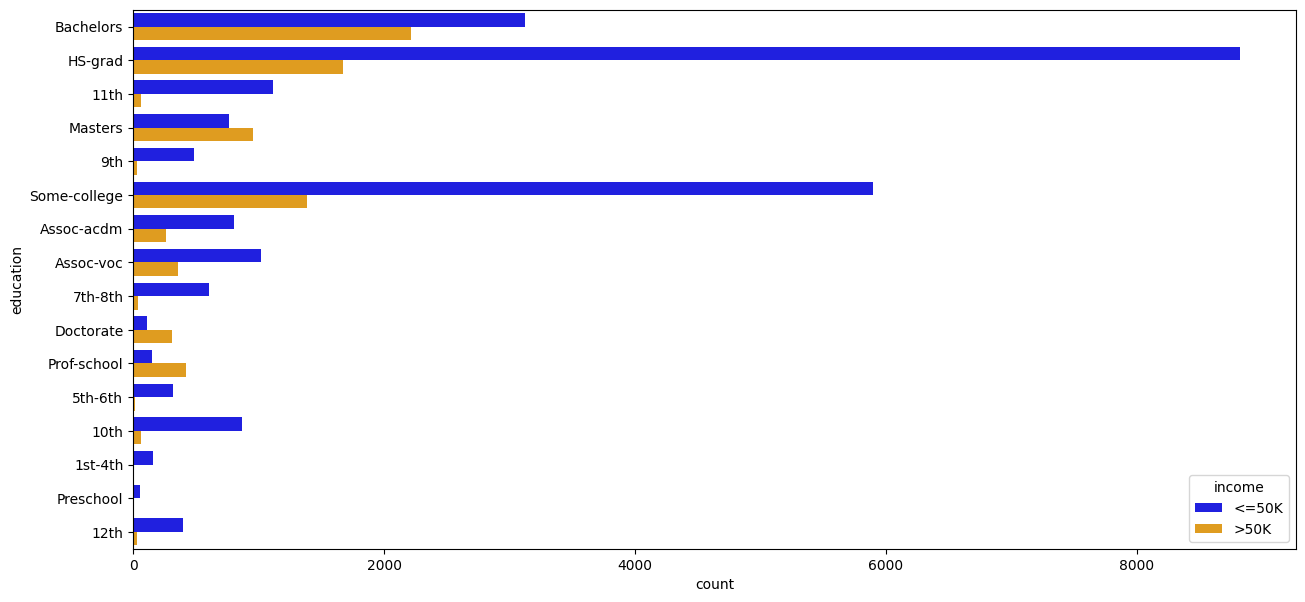

In [283]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, y = 'education',  hue = 'income', palette=color_income)


In [284]:
df['education'].value_counts()

HS-grad         10501
Some-college     7281
Bachelors        5343
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

* Distribuição da renda de acordo com a ocupação (occupation)

---



<Axes: xlabel='count', ylabel='occupation'>

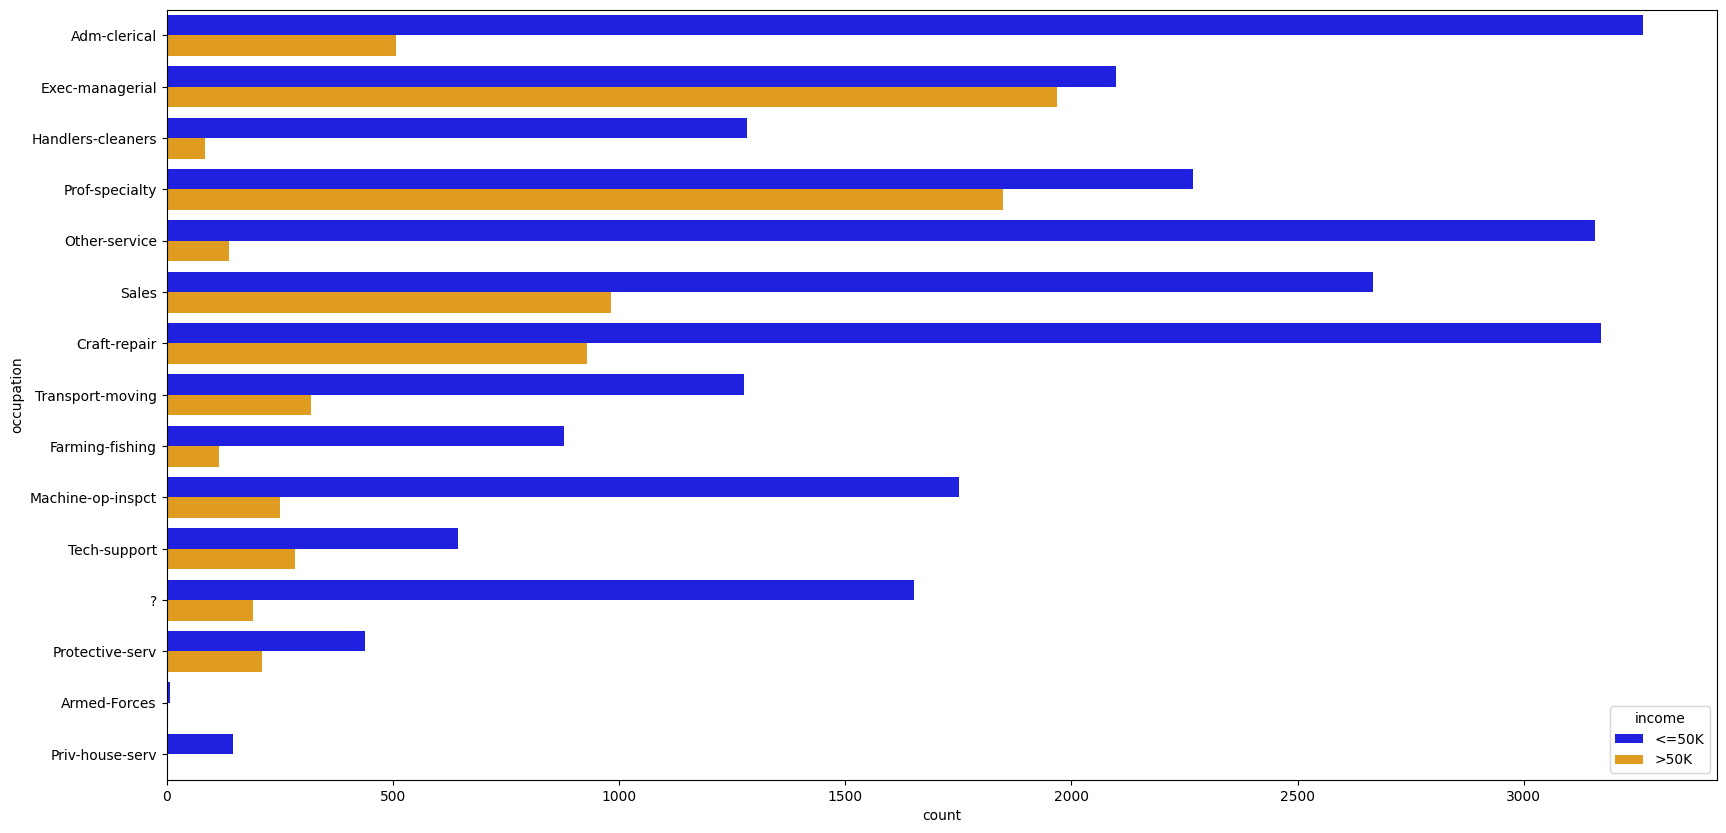

In [285]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, y = 'occupation',  hue = 'income', palette=color_income)

In [286]:
df['occupation'].value_counts()

Prof-specialty       4117
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

* Verificando a menor e a maior jornada de trabalho.

---



In [287]:
print(f"Menor jornada de trabalho por semana: {df['hours-per-week'].min()}")
print(f"maior jornada de trabalho por semana: {df['hours-per-week'].max()}")

Menor jornada de trabalho por semana: 1
maior jornada de trabalho por semana: 99


Faremos o  agrupamento das horas trabalhadas em 3 categorias:
* 0 - 30h (jornada curta)
* 30 - 44h (jornada normal)
* 44 - 100h (jornada extra)

<Axes: xlabel='group-work-hours', ylabel='count'>

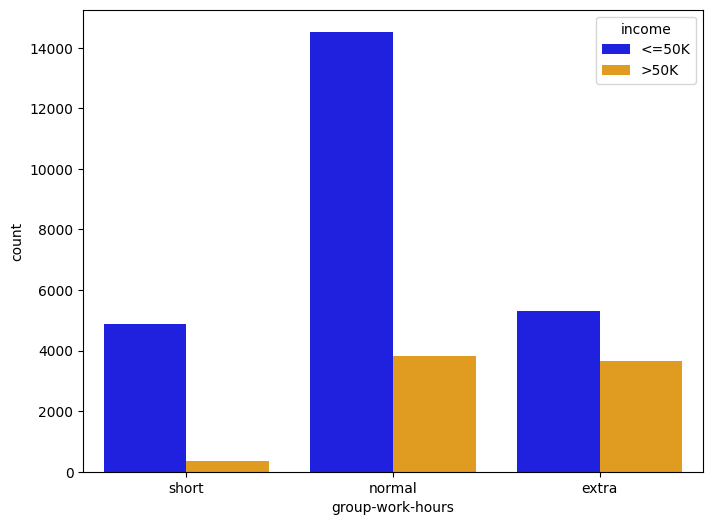

In [288]:
df['group-work-hours'] = pd.cut(df['hours-per-week'],[0,30,44,100], labels =['short','normal','extra'])

plt.figure(figsize=(8,6))
sns.countplot(data=df, x = 'group-work-hours',  hue = 'income', palette=color_income)

In [289]:
df['group-work-hours'].value_counts()

normal    18353
extra      8963
short      5245
Name: group-work-hours, dtype: int64

* Verificando a idade mínima e máxima dos dados

---



In [290]:
print(f'A idade mínima é: {df.age.min()} anos')
print(f'A idade máxima é: {df.age.max()} anos')

A idade mínima é: 17 anos
A idade máxima é: 90 anos


Faremos o agrupamento das idades em 3 categorias:
* 0-25 anos (jovens)
* 25-60 anos (adultos)
* 60-100 anos (idosos)

<Axes: xlabel='group-age', ylabel='count'>

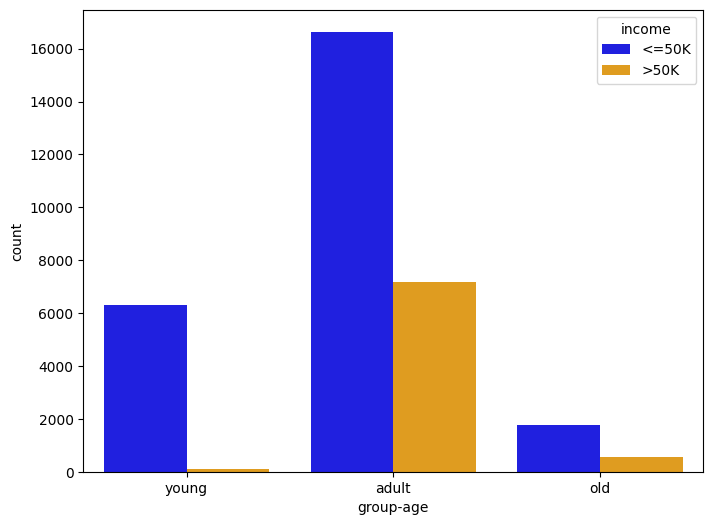

In [291]:
df['group-age'] = pd.cut(df['age'],[0,25,60,100], labels =['young','adult','old'])

plt.figure(figsize=(8,6))
sns.countplot(data=df, x = 'group-age',  hue = 'income', palette=color_income)

In [292]:
df['group-age'].value_counts()

adult    23818
young     6411
old       2332
Name: group-age, dtype: int64

* Relação entre sexo e renda

---



<Axes: xlabel='sex', ylabel='count'>

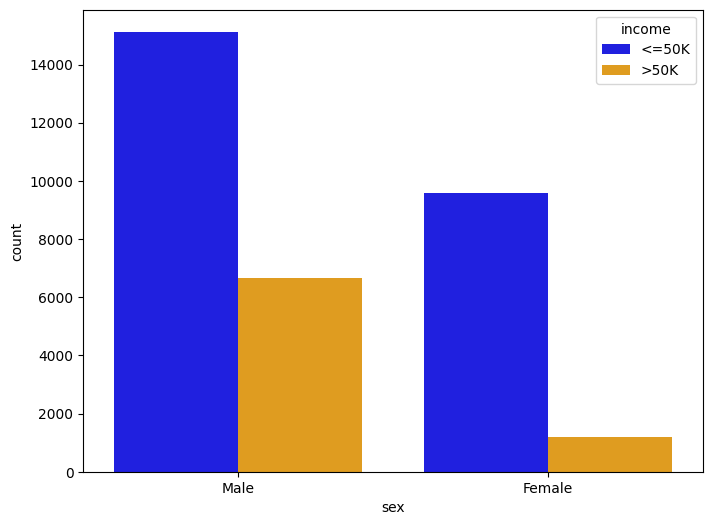

In [293]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="sex", hue='income', palette=color_income)

In [294]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

* Relação entre raça e renda

---



<Axes: xlabel='count', ylabel='race'>

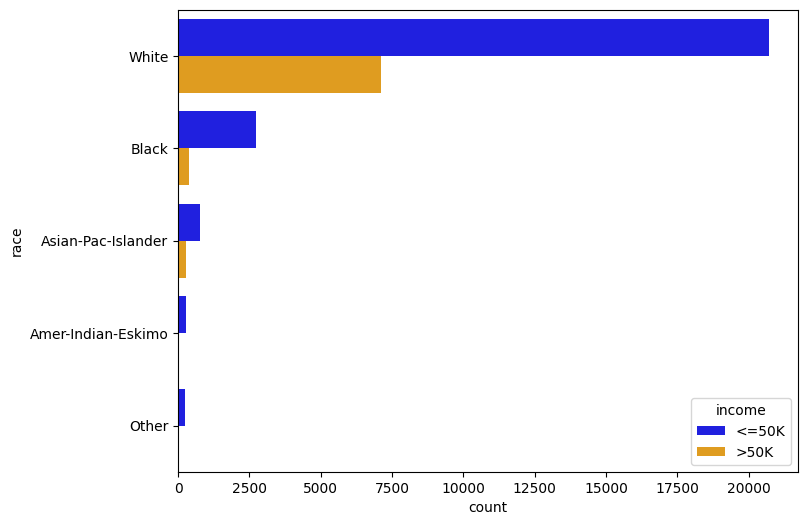

In [295]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y="race", hue='income', palette=color_income)

In [296]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

* Relação entre horas trabalhadas na semana (hours-per-week), e idade (age), observando a renda (income)

<Axes: xlabel='hours-per-week', ylabel='age'>

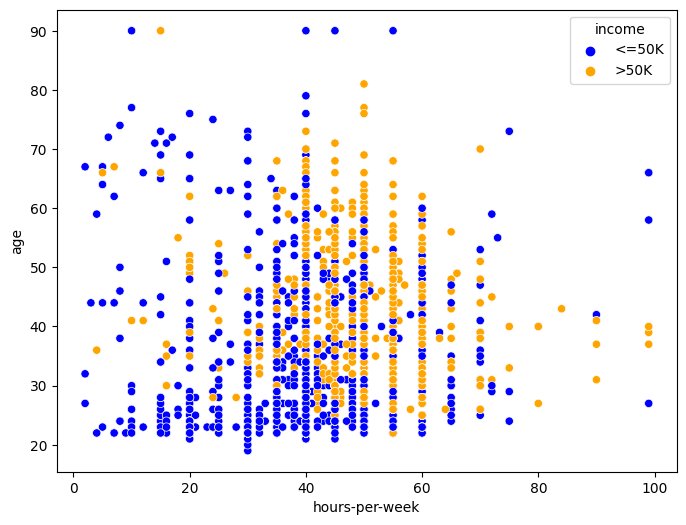

In [297]:
df_less_income = df[(df['native-country'] == 'United-States') & (df['education'] == 'Bachelors') & (df['workclass'] == 'Private')]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_less_income, x="hours-per-week", y="age", hue="income", palette=color_income)

## Tratamentos nível 1

Verificando a quantidade de valores nulos (se existirem) no dataset.

In [298]:
total = df.isnull().sum().sort_values(ascending=False)
percent = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
missing_data[missing_data['percent']!=0]

,total,percent
native-country,56,0.001720
workclass,53,0.001628
occupation,23,0.000706
education,22,0.000676


* Para motivos de estudos, os valores nulos serão substituidos pelo valor com maior aparecimento em sua categoria
* O correto seria fazer a análise de todos os campos para escolher melhor qual serio o preenchimento mais assertivo, ou se essas linhas poderiam ser excluidas

In [299]:
df['native-country'].value_counts()

United-States                 29122
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Portugal                         37
Iran                             35
Nicaragua                        34
Peru                             31
France                      

In [300]:
df['workclass'].value_counts()

Private             22666
Self-emp-not-inc     2518
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [301]:
df['occupation'].value_counts()

Prof-specialty       4117
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [302]:
df['education'].value_counts()

HS-grad         10501
Some-college     7281
Bachelors        5343
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

* Preenchendo os valores nulos das colunas

In [303]:
df['native-country'] = df['native-country'].fillna('United-States')
df['workclass'] = df['workclass'].fillna('Private')
df['occupation'] = df['occupation'].fillna('Prof-specialty')
df['education'] = df['education'].fillna('HS-grad')

* Verificando se ainda existem valores nulos

In [304]:
if df.isnull().sum().sort_values(ascending=False).any() != 0:
    print(f'Existe valores nulos no dataset? {True}')
else:
    print(f'Existe valores nulos no dataset? {False}')

Existe valores nulos no dataset? False


* Criaremos uma nova variável com subtraindo ganhos e perdas, afim de capturar a renda final ('final-income')

In [305]:
df['final-income'] = df['capital-gain'] - df['capital-loss']

In [306]:
df['final-income'].describe()

count    32561.000000
mean       990.345014
std       7408.986951
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: final-income, dtype: float64

## Tratamentos nível 2

* Retirando variável 'education', pois já tem na base seu respectivo código

In [307]:
df = df.drop(columns=['education']) # já temos seu código

Para um modelo (dos testados mais abaixo) ter uma performance e assertividade aceitavel, é necessário a tranformação de todas as variáveis em quantitativas

In [308]:
cols = df[df.select_dtypes(['object']).columns]

for c in cols:
    encoding = LabelEncoder()
    encoding.fit(list(df[c].values))
    df[c] = encoding.transform(list(df[c].values))
df = pd.get_dummies(df)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      32561 non-null  int64
 1   workclass                32561 non-null  int64
 2   fnlwgt                   32561 non-null  int64
 3   education-num            32561 non-null  int64
 4   marital-status           32561 non-null  int64
 5   occupation               32561 non-null  int64
 6   relationship             32561 non-null  int64
 7   race                     32561 non-null  int64
 8   sex                      32561 non-null  int64
 9   capital-gain             32561 non-null  int64
 10  capital-loss             32561 non-null  int64
 11  hours-per-week           32561 non-null  int64
 12  native-country           32561 non-null  int64
 13  income                   32561 non-null  int64
 14  final-income             32561 non-null  int64
 15  gr

## Escolha das variáveis

Matriz de correlação: análise simultânea da associação entre variáveis.

<Axes: >

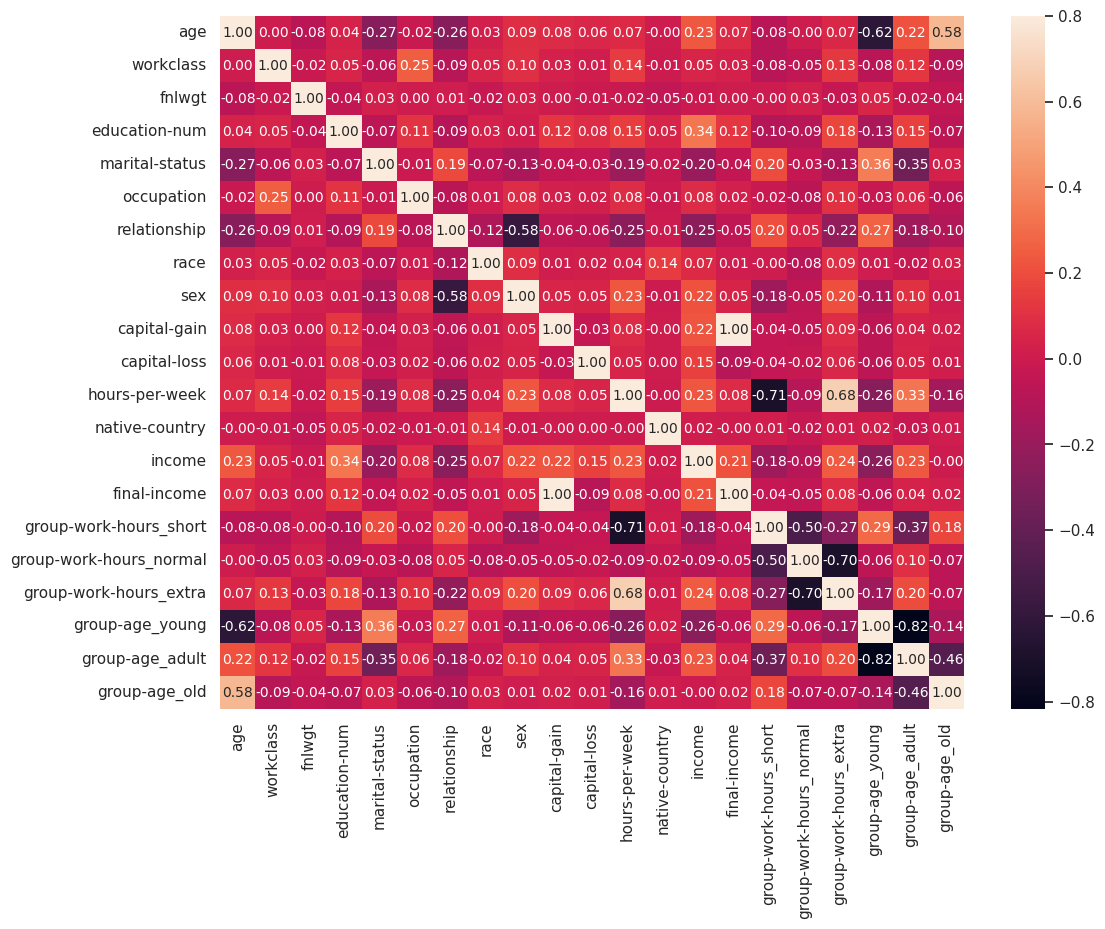

In [310]:
corr = df.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f')

In [311]:
corr_list = corr['income'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

education-num              0.335154
group-work-hours_extra     0.242447
age                        0.234037
group-age_adult            0.233447
hours-per-week             0.229689
capital-gain               0.223329
sex                        0.215980
final-income               0.214428
capital-loss               0.150526
occupation                 0.075468
race                       0.071846
workclass                  0.051301
native-country             0.016560
group-age_old             -0.002944
fnlwgt                    -0.009463
group-work-hours_normal   -0.086549
group-work-hours_short    -0.177816
marital-status            -0.199307
relationship              -0.250918
group-age_young           -0.258270
Name: income, dtype: float64

Importante separar o que desejamos prever (neste caso a variável 'income')

In [312]:
train_data = df.drop('income',axis=1)
class_data = df['income']

Setando instância, n de arvores e semente aleatoria, e criando a Random Forest

In [313]:
clf=RandomForestClassifier(n_estimators=100, random_state=7)

Treinando o modelo usando dados de treinamento (train_data), e sua correspodente resposta (class_data)

In [314]:
clf.fit(train_data, class_data)

RandomForestClassifier(random_state=7)

Calculando a importância das variáveis para o modelo de Random Forest

In [315]:
feature_imp = pd.Series(clf.feature_importances_,index=train_data.columns).sort_values(ascending=False)
feature_imp

fnlwgt                     0.168681
age                        0.133446
education-num              0.113600
relationship               0.105220
final-income               0.091881
occupation                 0.066601
capital-gain               0.062992
hours-per-week             0.062833
marital-status             0.050720
workclass                  0.038936
capital-loss               0.023109
native-country             0.016514
race                       0.013581
group-age_young            0.012748
group-work-hours_extra     0.010195
sex                        0.009008
group-age_adult            0.008184
group-work-hours_short     0.005234
group-work-hours_normal    0.003892
group-age_old              0.002624
dtype: float64

Plotando para ficar mais visual

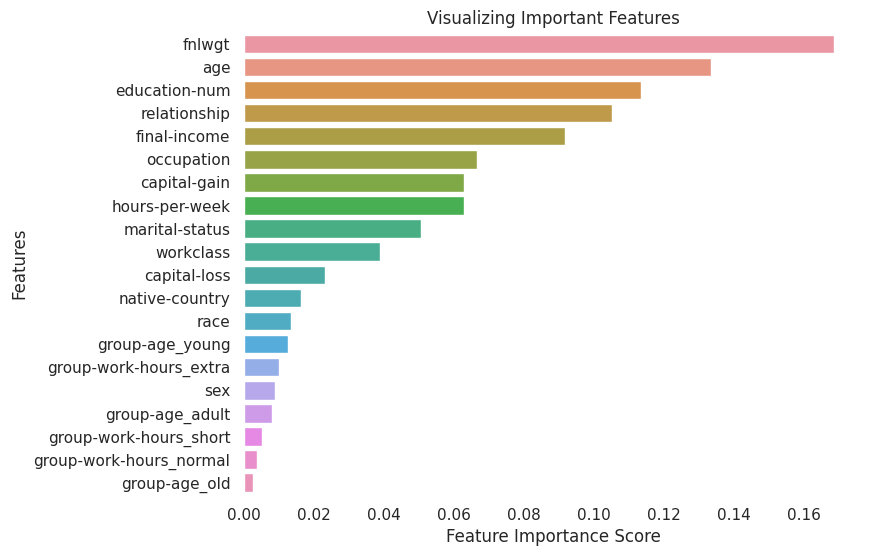

In [316]:
plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Selecionando as variáveis de maior relevância para o modelo
* Por convenção foi setado o corte da variável em 3% de importância

In [317]:
features_selected = []
for feature,importance in feature_imp.iteritems():
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)

fnlwgt: 17%
age: 13%
education-num: 11%
relationship: 11%
final-income: 9%
occupation: 7%
capital-gain: 6%
hours-per-week: 6%
marital-status: 5%
workclass: 4%


<ipython-input-317-4f6d091bc332>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature,importance in feature_imp.iteritems():


## Modelo

Treinando os modelos utilizando apenas as variáveis selecionadas acima

In [318]:
train_data = df[features_selected]
class_data = df['income']

Vamos testas os modelos de Machine Learning a seguir:
* Regressão Logística (LogisticRegression)
* Algoritmo de vizinhança (KNeighborsClassifier)
* Árvore de decisão (DecisionTreeClassifier)
* Naive Bayes (GaussianNB)
* Random Forest (RandomForestClassifier)        

Obs:
1. Com dados em diferentes escalas, alguns modelos podem ter sua precisão prejudicada
2. Vamos fazer padronização do conjunto de dados (colocando-os na mesma escala)
3. Normalização (média = 0 e desvpad = 1)

In [319]:
pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))),
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))),
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())]))),
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))),
pipelines.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in pipelines:
    kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=7)
    cross_val_result = model_selection.cross_val_score(modelo,
                                                     train_data,
                                                     class_data,
                                                     cv = kfold,
                                                     scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-LR: 0.821873 (0.004528)
Scaled-KNN: 0.835355 (0.004233)
Scaled-CART: 0.811922 (0.006896)
Scaled-NB: 0.791898 (0.003193)
Scaled-RF: 0.856761 (0.004500)


Visualizando resultados

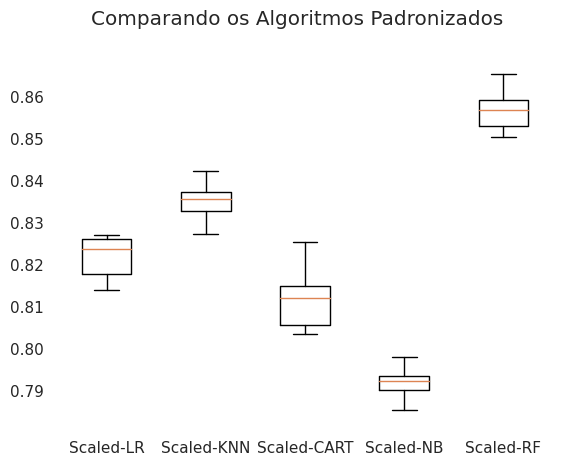

In [320]:
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [321]:
# Preparando a versão final do modelo.
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
modelo_random_forest = RandomForestClassifier(criterion='entropy', max_depth=14, random_state=7)
modelo_random_forest.fit(train_data,class_data)
result_random_forest = cross_val_predict(modelo_random_forest,train_data, class_data, cv=10)

print(f'Acurácia: {accuracy_score(class_data,result_random_forest)}')
print('\n',confusion_matrix(class_data,result_random_forest))
print('\n',classification_report(class_data,result_random_forest))

Acurácia: 0.8649918614293173

 [[23432  1288]
 [ 3108  4733]]

               precision    recall  f1-score   support

           0       0.88      0.95      0.91     24720
           1       0.79      0.60      0.68      7841

    accuracy                           0.86     32561
   macro avg       0.83      0.78      0.80     32561
weighted avg       0.86      0.86      0.86     32561

